there are many thing missing in this code, i will come back here once i got better

Let's import the necessary libraries first

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import SparseCategoricalCrossentropy




Lets get the dataset

In [23]:
#first we get the dataset into the program, than change the good and bad to 1 and zero
df = pd.read_excel(r'C:\Users\Yusuf Ertuğrul\OneDrive\Belgeler\Visual_Studio_Projects\Apple_Quality\appple_updated.xlsx')
df['Quality'] = df['Quality'].map({'good':1,'bad':0})

#just wanted to see how many apples are good vs bad
quality_counts = df['Quality'].value_counts()

print("Count of 'good' apples:", quality_counts[1])
print("Count of 'bad' apples:", quality_counts[0])

Count of 'good' apples: 2004
Count of 'bad' apples: 1996


deleting the unusable data

In [24]:
# getting the row count before deleting any
num_rows_before = df.shape[0]

# Drop any rows with missing values
df.dropna(inplace=True)
# getting the row count after deleting so we can compare
num_rows_after = df.shape[0]

# we seperate the training part and the target variable, we are gonna train our model without the quality than check it
X = df.drop('Quality', axis=1)
y = df['Quality']

#A_id is just the number of datas they are unimportant and harmful to our data
df.drop('A_id', axis=1, inplace=True)

#just checking if we have dropped any rows
if num_rows_before != num_rows_after:
    print("Rows with missing values have been deleted.")
    print("Number of rows before:", num_rows_before)
    print("Number of rows after:", num_rows_after)
else:
    print("No rows with missing values were deleted.")

# Extract features (X) and target variable (y)
X = df.drop('Quality', axis=1)  # Features
y = df['Quality']

# df.head()
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))    

No rows with missing values were deleted.
The shape of X is: (4000, 7)
The shape of y is: (4000,)


Scaling the data

In [25]:
# now that our data is ready to do its duty, we should scale the data to get better results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# lets print out the first 4 values of the X and scaled_X to see it's difference
# first_4_rows_X = X.head(4)
# first_4_rows_X_scaled = pd.DataFrame(X_scaled[:4], columns=X.columns)

# print("First 4 rows of original X:")
# print(first_4_rows_X)

# print("\nFirst 4 rows of scaled X:")
# print(first_4_rows_X_scaled)

Splitting data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

Model

In [27]:
#lets create our model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# After defining the model architecture, you need to compile the model and specify the loss function, optimizer, and metrics to monitor during training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Lets train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

#predicting y
y_pred = model.predict(X_test)

Epoch 1/12


94/94 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.7307 - val_loss: 0.4616 - val_accuracy: 0.8130
Epoch 2/12
94/94 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8057 - val_loss: 0.3879 - val_accuracy: 0.8330
Epoch 3/12
94/94 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8260 - val_loss: 0.3632 - val_accuracy: 0.8490
Epoch 4/12
94/94 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8330 - val_loss: 0.3512 - val_accuracy: 0.8550
Epoch 5/12
94/94 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8393 - val_loss: 0.3486 - val_accuracy: 0.8500
Epoch 6/12
94/94 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8470 - val_loss: 0.3436 - val_accuracy: 0.8520
Epoch 7/12
94/94 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8513 - val_loss: 0.3445 - val_accuracy: 0.8500
Epoch 8/12
94/94 [=============

Getting the accuraty

In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy: %", accuracy*100)



Accuracy: % 84.2
Epoch 1/20
125/125 [==============================] - 0s 807us/step - loss: 2802420.5000
Epoch 2/20
125/125 [==============================] - 0s 740us/step - loss: 2698555.7500
Epoch 3/20
125/125 [==============================] - 0s 722us/step - loss: 2145059.0000
Epoch 4/20
125/125 [==============================] - 0s 722us/step - loss: 2519871.5000
Epoch 5/20
125/125 [==============================] - 0s 737us/step - loss: 2544366.2500
Epoch 6/20
125/125 [==============================] - 0s 759us/step - loss: 2183204.5000
Epoch 7/20
125/125 [==============================] - 0s 743us/step - loss: 2370602.2500
Epoch 8/20
125/125 [==============================] - 0s 722us/step - loss: 2018468.1250
Epoch 9/20
125/125 [==============================] - 0s 711us/step - loss: 1842741.2500
Epoch 10/20
125/125 [==============================] - 0s 742us/step - loss: 1648489.2500
Epoch 11/20
125/125 [==============================] - 0s 699us/step - loss: 1698151.0000
Ep

some grafs

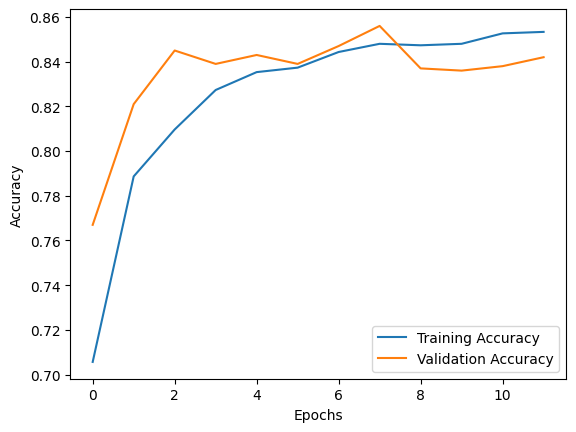

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


loss plots

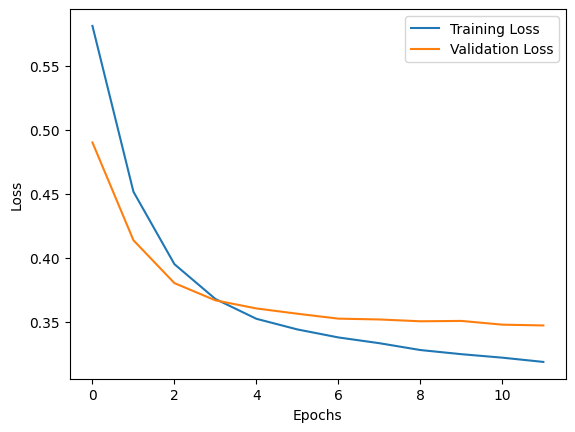

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Confusion Matrix

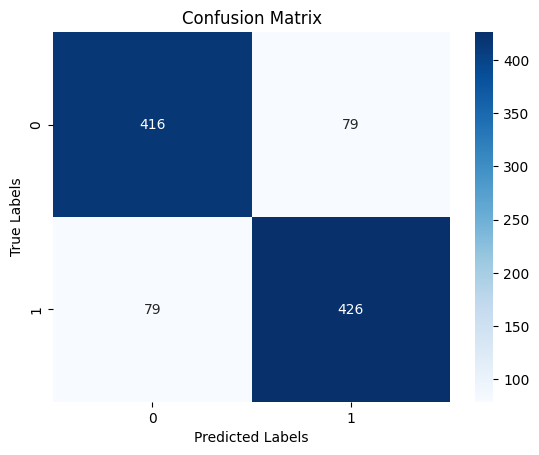

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ROC Curve:

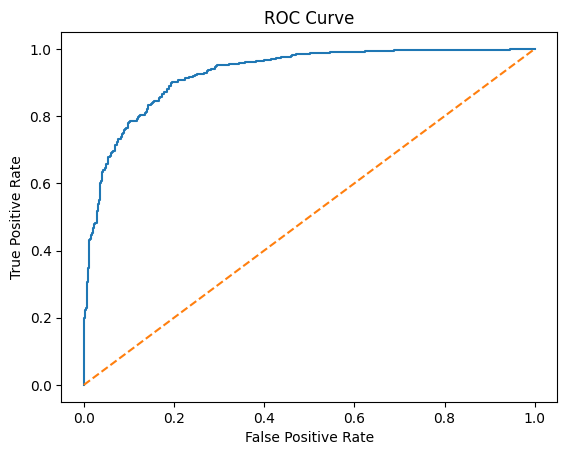

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Precision-Recall Curve

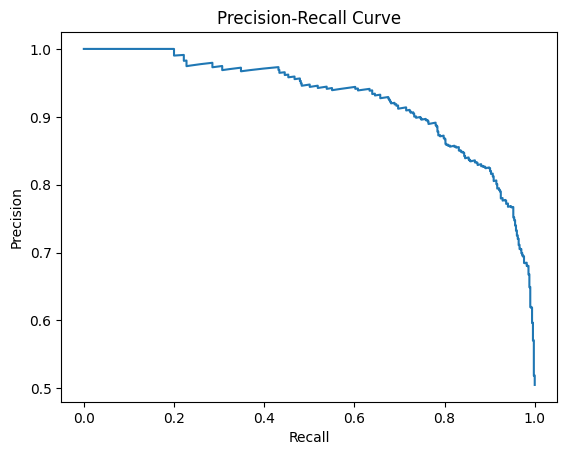

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Learning Rate Scheduler

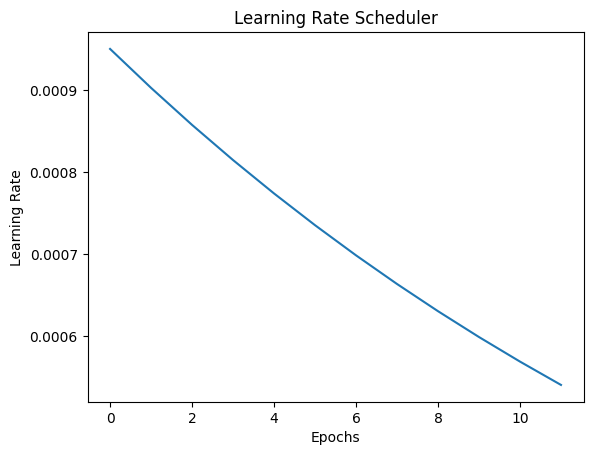

In [ ]:
plt.plot(history.history['lr'])
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Scheduler')
plt.show()
